
-------- Input data -----------------

     ID  Employment period   Time in current department   Gender   \
0  6723                   5                            4        0   
1  8923                   5                            3        1   
2  2322                  11                            8        0   
3   235                   7                            5        1   
4  9523                  18                            8        0   

   Team leader   Age   Member of professional organizations   .Net   \
0             1    48                                      1      1   
1             1    26                                      1      1   
2             0    34                                      0      0   
3             1    27                                      1      0   
4             0    38                                      0      0   

   SQL Server   HTML CSS Java Script   PHP mySQL   Fast working  Awards  \
0            1                      0      

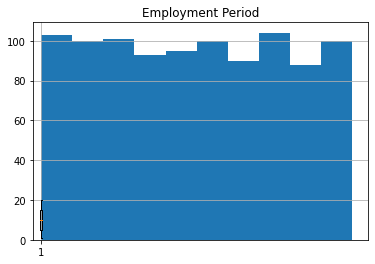


-------- Data Analysis - Time in current department -----------------

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa264185490>]]
count    974.000000
mean       5.666324
std        3.206903
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       12.000000
Name: Time in current department, dtype: float64

-------- Data Analysis - Age -----------------

count    974.000000
mean      40.468172
std        8.080181
min       24.000000
25%       34.000000
50%       40.000000
75%       47.000000
max       55.000000
Name: Age, dtype: float64


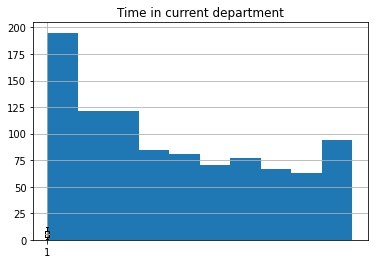

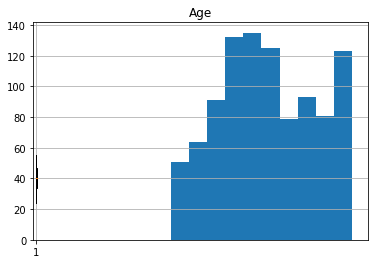


-------- Data Analysis - Gender -----------------

0    502
1    472
Name: Gender, dtype: int64

-------- Data Analysis - Team leader -----------------

1    491
0    483
Name: Team leader, dtype: int64

-------- Data Analysis -  Member of professional organizations -----------------

0    494
1    480
Name: Member of professional organizations, dtype: int64

-------- Data Analysis -  .Net -----------------

0    511
1    463
Name: .Net, dtype: int64

-------- Data Analysis -  SQL Server -----------------

0    509
1    465
Name: SQL Server, dtype: int64

-------- Data Analysis -  HTML CSS Java Script -----------------

1    497
0    477
Name: HTML CSS Java Script, dtype: int64

-------- Data Analysis -  PHP mySQL -----------------

0    509
1    465
Name: PHP mySQL, dtype: int64

-------- Data Analysis -  Fast working -----------------

1    493
0    481
Name: Fast working, dtype: int64

-------- Data Analysis -  Awards -----------------

1    490
0    484
Name: Awards, dtype: int64


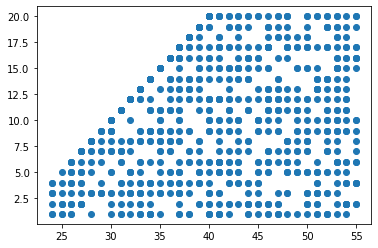

0.16561981982286003
None

-------- Data Analysis -  Age & Time in current department -----------------



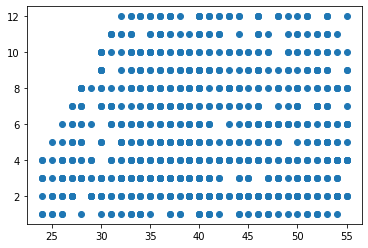

0.07492866973858783

-------- Data Analysis -  Employment period & Time in current department -----------------



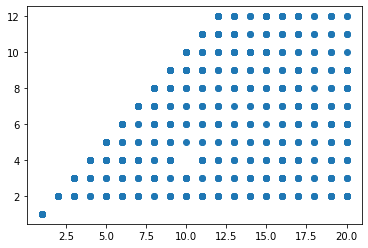

0.4959277446659778

-------- Data Transformation -----------------

     ID  Employment Period  Time in current department  Gender  Team leader  \
0  6723                  5                           4       0            1   
1  8923                  5                           3       1            1   
2  2322                 11                           8       0            0   
3   235                  7                           5       1            1   
4  9523                 18                           8       0            0   

   Age  Member of professional organizations  .Net  SQL Server  \
0   48                                     1     1           1   
1   26                                     1     1           0   
2   34                                     0     0           1   
3   27                                     1     0           1   
4   38                                     0     0           0   

   HTML CSS Java Script  PHP mySQL  Fast working  Awards  Co

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


       Team leader  Member of professional organizations        .Net  \
count   974.000000                            974.000000  974.000000   
mean      0.504107                              0.492813    0.475359   
std       0.500240                              0.500205    0.499649   
min       0.000000                              0.000000    0.000000   
25%       0.000000                              0.000000    0.000000   
50%       1.000000                              0.000000    0.000000   
75%       1.000000                              1.000000    1.000000   
max       1.000000                              1.000000    1.000000   

       SQL Server  HTML CSS Java Script   PHP mySQL  Fast working      Awards  \
count  974.000000            974.000000  974.000000    974.000000  974.000000   
mean     0.477413              0.510267    0.477413      0.506160    0.503080   
std      0.499746              0.500151    0.499746      0.500219    0.500247   
min      0.000000          

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

def preprocess_and_analysis():
    ### STEP 1: DATA COLLECTION ###
    ### Import csv file as panda data frame
    df=pd.read_csv('https://raw.githubusercontent.com/snakessilver/Skills_traits/main/Employee_skills_traits.csv')
    print("\n-------- Input data -----------------\n")
    print(df.head())

    print(df.info())
    ### STEP 2: DATA PRE-PROCESSING ###
    ### Removing spaces from column name
    df=df.rename(columns={"Employment period ":"Employment Period",
          "Time in current department ":"Time in current department",
          "Gender ":"Gender",
          "Team leader ":"Team leader",
          "Age ":"Age",
          "Member of professional organizations ":"Member of professional organizations",
          ".Net ":".Net",
          "SQL Server ":"SQL Server",
          "HTML CSS Java Script ":"HTML CSS Java Script",
          "PHP mySQL ":"PHP mySQL",
          "Communicative ":"Communicative"})
    print("\n-------- after removing space from column names -----------------\n")
    print(df.columns)
    
    ### Checking for unwanted values
    print("\n-------- columns that have employement period greater than age -----------------\n")
    print(df[df["Employment Period"]>df["Age"]])
    print("\n-------- columns that have Time in current department greater than age -----------------\n")
    print(df[df["Time in current department"]>df["Age"]])

    ### Drop null values
    df=df.dropna()
    print("\n-------- after dropping null values -----------------\n")
    print(df)
    print(df.columns)
    print(df.info())
    print(df.describe())
    print(df['ID'].value_counts())


    ### Drop duplicate records

    df.drop_duplicates(subset = 'ID', keep = 'first', inplace = True)
    print("\n-------- Drop duplicate records -----------------\n")
    print(df)

    print(df['ID'].value_counts())
    print(df.info())

    ### STEP 3: EXPLORATORY DATA ANALYSIS ###
    ### 1) Employment period
    print("\n-------- Data Analysis - Employment period -----------------\n")
    df.hist(column='Employment Period')
    print(df['Employment Period'].describe())
    plt.ion()
    plt.boxplot(df['Employment Period'])
    plt.pause(0.05)


    ### 2) Time in current department
    print("\n-------- Data Analysis - Time in current department -----------------\n")
    print(df.hist(column='Time in current department'))
    print(df['Time in current department'].describe())
    plt.boxplot(df['Time in current department'])


    ### 3) Age
    print("\n-------- Data Analysis - Age -----------------\n")
    df.hist(column='Age')
    print(df['Age'].describe())
    plt.boxplot(df['Age'])
    plt.pause(0.05)


    ### 4) Gender
    print("\n-------- Data Analysis - Gender -----------------\n")
    print(df['Gender'].value_counts())


    ### 5) Team leader
    print("\n-------- Data Analysis - Team leader -----------------\n")
    print(df['Team leader'].value_counts())


    ### 6) Member of professional organizations
    print("\n-------- Data Analysis -  Member of professional organizations -----------------\n")
    print(df['Member of professional organizations'].value_counts())


    ### 7) .Net
    print("\n-------- Data Analysis -  .Net -----------------\n")
    print(df['.Net'].value_counts())


    ### 8) SQL Server
    print("\n-------- Data Analysis -  SQL Server -----------------\n")
    print(df['SQL Server'].value_counts())


    ### 9) HTML CSS Java Script
    print("\n-------- Data Analysis -  HTML CSS Java Script -----------------\n")
    print(df['HTML CSS Java Script'].value_counts())


    ### 10) PHP mySQL
    print("\n-------- Data Analysis -  PHP mySQL -----------------\n")
    print(df['PHP mySQL'].value_counts())


    ### 11) Fast working
    print("\n-------- Data Analysis -  Fast working -----------------\n")
    print(df['Fast working'].value_counts())


    ### 12) Awards
    print("\n-------- Data Analysis -  Awards -----------------\n")
    print(df['Awards'].value_counts())


    ### 13) Communicative
    print("\n-------- Data Analysis -  Communicative -----------------\n")
    print(df['Communicative'].value_counts())


    ### *Age & Employment period
    print("\n-------- Data Analysis -  Age & Employment period -----------------\n")
    fig, ax = plt.subplots()
    ax.scatter(df['Age'], df['Employment Period'])
    plt.show()
    plt.pause(0.05)

    print(print(df['Age'].corr(df['Employment Period'])))


    ### *Age & Time in current department
    print("\n-------- Data Analysis -  Age & Time in current department -----------------\n")
    fig, ax = plt.subplots()
    ax.scatter(df['Age'], df['Time in current department'])
    plt.show()
    plt.pause(0.05)

    print(df['Age'].corr(df['Time in current department']))


    ### *Employment period & Time in current department
    print("\n-------- Data Analysis -  Employment period & Time in current department -----------------\n")
    fig, ax = plt.subplots()
    ax.scatter(df['Employment Period'], df['Time in current department'])
    plt.show()
    plt.pause(0.05)


    print(df['Employment Period'].corr(df['Time in current department']))


    ### STEP 4: DATA TRANSFORMATION- BINNING ###
    print("\n-------- Data Transformation -----------------\n")
    cut_labels_4 = ['entry', 'mid', 'sr', 'exec']
    cut_bins = [1, 3, 8, 15, 20]
    df['cut_Employment period'] = pd.cut(df['Employment Period'], bins=cut_bins, labels=cut_labels_4)


    cut_labels_4 = ['fresher', 'senior', 'experienced']
    cut_bins = [1, 2, 8, 12]
    df['cut_Time in current department'] = pd.cut(df['Time in current department'], bins=cut_bins, labels=cut_labels_4)


    cut_labels_4 = ['youngster', 'middle_aged', 'old']
    cut_bins = [24, 30, 50, 55]
    df['cut_Age'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels_4)
    print(df.head())

    df['Gender'].replace(0, 'Female',inplace=True)
    df['Gender'].replace(1, 'Male',inplace=True)


    ### STEP 5: DATA TRANSFORMATION (CONVERSION) ###
    tdf = pd.get_dummies(df)
    print(tdf.head())

    tdf.columns

    ### STEP 6: DIMENSIONALITY REDUCTION ###
    tdf = tdf.drop(['ID', 'Employment Period', 'Time in current department', 'Age'], 1)
    print(tdf.head())

    print(tdf.describe())

    print(tdf.columns)
    print(tdf.info())
    print("\n-------- Preprocessinng & Analysis completed -----------------\n")

    return tdf

### STEP 7 & 8: GENERATING FREQUENT ITEMS AND ASSOCIATION RULES
def get_frq_items(tdf, min_support):
    return apriori(tdf, min_support, use_colnames = True)


def get_association_rules(frq_items):
    rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
    return rules.sort_values(['lift', 'confidence'], ascending =[False, False])


def execute(ip, min_support):
    frq_items = get_frq_items(ip, min_support)
    rules = get_association_rules(frq_items)
    return rules


def main():
    tdf = preprocess_and_analysis()

    print("\n-------- Min support = 0.1 --------------------\n")
    print(execute(tdf, 0.1).head())
    print("\n-------- Min support = 0.2 -----------------\n")
    print(execute(tdf, 0.2).head())
    print("\n-------- Min support = 0.25 -----------------\n")
    print(execute(tdf, 0.25).head())
    print("\n-------- Min support = 0.3 -----------------\n")
    print(execute(tdf, 0.3).head())
    print("\n-------- Min support = 0.4 -----------------\n")
    print(execute(tdf, 0.4))
    print("\n-------- Min support = 0.5 -----------------\n")
    print(execute(tdf, 0.5))
    print("\n-------- Min support = 0.6 -----------------\n")
    print(execute(tdf, 0.6))

    output = open('output_file.txt', 'w')
    ### We get best results with min support = 0.2
    frq_items = apriori(tdf, min_support = 0.2, use_colnames = True)
    output.write("\n--------------Frequent Items & support Count = 0.2---------------------\n")
    output.write(frq_items.to_string(header = True, index = True))
    rules = get_association_rules(frq_items)
    output.write("\n\n\n\n--------------Association rules---------------------\n")
    output.write(rules.to_string(header = True, index = True))
    output.close()

main()